In [491]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt


In [492]:
# is_slippery defines if environment is/has stochasticness in it or if it is deterministic
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode = "ansi")

In [493]:
state_size = env.observation_space.n
action_size = env.action_space.n


In [494]:
qtable = np.random.uniform(0,1,(state_size, action_size))
qtable

array([[4.90602396e-01, 9.78026446e-01, 9.54657852e-01, 4.33688246e-01],
       [2.92317584e-02, 1.47292626e-01, 7.26506832e-02, 1.88355272e-01],
       [9.09704372e-01, 5.14982941e-01, 9.28253658e-01, 3.48695625e-01],
       [3.59823180e-01, 4.36930688e-01, 8.10847952e-01, 7.52670342e-01],
       [1.57089093e-01, 4.94697604e-01, 2.69415700e-01, 4.52921865e-01],
       [2.13939060e-01, 6.51866012e-01, 2.02208882e-01, 3.57265626e-01],
       [2.33681398e-01, 1.02203474e-01, 3.54124325e-01, 6.26052567e-04],
       [4.28752839e-01, 1.00456401e-01, 7.60237161e-01, 4.23924779e-01],
       [3.02853379e-02, 1.37010592e-01, 2.74496874e-02, 2.43987685e-01],
       [3.54883523e-01, 6.78338742e-01, 2.99279964e-01, 7.53969495e-01],
       [2.56733794e-01, 1.79571899e-01, 5.63543754e-01, 9.61276547e-01],
       [5.26692703e-01, 8.52968076e-01, 2.90203850e-02, 7.44803554e-01],
       [2.93252068e-01, 8.75915317e-01, 2.23151096e-01, 1.44833022e-01],
       [7.86198664e-01, 4.46672718e-01, 1.29107622e

In [495]:
lr = 0.1
n_episodes = 10000
steps = 150
discount = 0.95
exploration_factor = 0.7
min_exploration_factor = 0.1
decay_rate = 0.9


In [496]:
def policy(qtable, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.randint(0,4)  # Explore
    else:
        return np.argmax(qtable[state,:])  # Exploit

In [497]:
def training(Q, episode_length):
    state = env.reset()[0]
    for step in range(episode_length):
        #Choose action
        action = policy(Q, state, exploration_factor)
        new_state, reward, done, truncated, info = env.step(action)
        
        # Update the Qtable
        Q[state, action] = Q[state, action] + lr*(reward + discount*np.max(Q[new_state]) - Q[state,action])
        state = new_state
        if done:
            break            
    env.close()
    return Q  
    

In [498]:
# Training the model
for episode in range(n_episodes):
    qtable = training(qtable, steps)
    exploration_factor = max(min_exploration_factor, exploration_factor * decay_rate)


In [499]:
qtable

array([[0.57470459, 0.57657547, 0.57927343, 0.56904554],
       [0.58861391, 0.60706887, 0.58755315, 0.57968326],
       [0.62074485, 0.63717066, 0.66945331, 0.60144401],
       [0.62537754, 0.62475572, 0.65541748, 0.61157542],
       [0.63247804, 0.64765529, 0.62143978, 0.62345297],
       [0.21393906, 0.65186601, 0.20220888, 0.35726563],
       [0.69331272, 0.7933024 , 0.68539133, 0.66019335],
       [0.42875284, 0.1004564 , 0.76023716, 0.42392478],
       [0.76855858, 0.81730324, 0.75971712, 0.76182881],
       [0.82173135, 0.87358762, 0.84370872, 0.78844996],
       [0.88203094, 0.95488337, 0.84300338, 0.78558832],
       [0.5266927 , 0.85296808, 0.02902039, 0.74480355],
       [0.29325207, 0.87591532, 0.2231511 , 0.14483302],
       [0.88169451, 0.98980269, 0.93391655, 0.80425018],
       [1.05748642, 1.34599226, 1.17941896, 1.11516916],
       [0.08809882, 0.66264263, 0.83876212, 0.64137609]])

In [500]:
def eval_policy(steps):
    state = env.reset()[0]
    done = False
    
    total_reward = 0
    for step in range(steps):
        action = policy(qtable, state, exploration_factor)
        new_state, reward, done, truncated, info = env.step(action)
        total_reward += reward
        state = new_state
        if done:
            break
    env.close()
    return total_reward
  
testreturns = []
testepisodes = []
for episode in range(10000):
    total_reward = eval_policy(steps)
    testreturns.append(total_reward)
    testepisodes.append(episode)

print(testreturns)    
print(f"Average return over {len(testepisodes)} episodes: {np.mean(testreturns)}")
print(f"Best return over {np.max(testepisodes)+1} episodes: {np.max(testreturns)}")
print(f"Last return over {np.max(testepisodes)+1} episodes: {testreturns[-1]}")


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

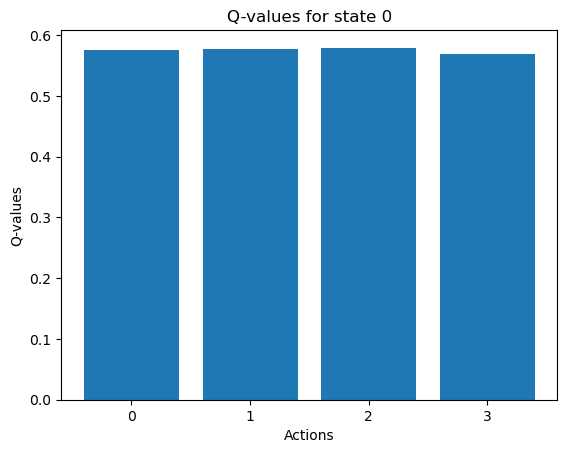

In [501]:
import matplotlib.pyplot as plt

# Plot the learned Q-values for the actions from a particular state
state = 0  # Choose a specific state
plt.bar(range(env.action_space.n), qtable[state])
plt.xticks(range(env.action_space.n))
plt.xlabel('Actions')
plt.ylabel('Q-values')
plt.title(f'Q-values for state {state}')
plt.show()